## Bioinformatics - Data Collection and Pre-Processing

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('CHEMBL4822')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Beta-secretase_1', 'xref_name': ...",Homo sapiens,Beta-secretase 1,14.0,False,CHEMBL4822,"[{'accession': 'P56817', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Beta-secretase (BACE),12.0,False,CHEMBL2111390,"[{'accession': 'Q9Y5Z0', 'component_descriptio...",PROTEIN FAMILY,9606


In [3]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [4]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890923,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,775.0
10615,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890924,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,1031.0
10616,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890925,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,828.0
10617,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963344,[],CHEMBL5216426,Inhibition of BACE1 (unknown origin) using A-b...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,15.1


In [5]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [6]:
import pandas as pd
df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})

In [7]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,413.000
1,NaN,NaN,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.002
2,NaN,NaN,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.460
3,NaN,NaN,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,9.000
4,NaN,NaN,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24890923,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,775.000
10615,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24890924,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,1031.000
10616,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24890925,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,828.000
10617,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24963344,[],CHEMBL5216426,Inhibition of BACE1 (unknown origin) using A-b...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,15.100


In [8]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (10619, 46) and (10472, 46)


In [9]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0
...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1


In [10]:
df3.standard_value.describe()

count    1.047200e+04
mean     3.437005e+04
std      9.562719e+05
min      2.000000e-04
25%      2.500000e+01
50%      1.915000e+02
75%      2.296000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

<Axes: ylabel='standard_value'>

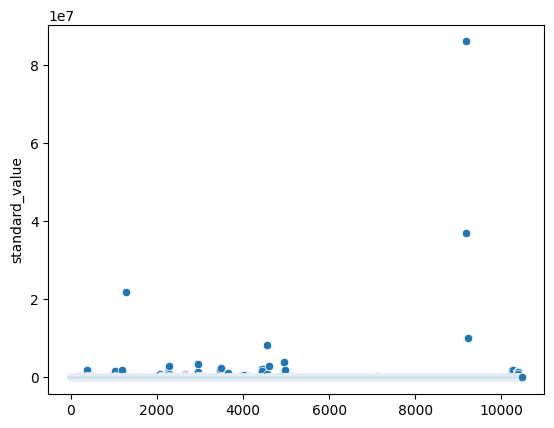

In [22]:
sns.scatterplot(x=df3.index, y='standard_value', data=df3)

In [25]:
high_IC50_rows = df3[df3['standard_value'] > 6000000].index
high_IC50_rows

Index([1280, 4562, 9181, 9183, 9229], dtype='int64')

In [26]:
df_final = df3[df3['standard_value'] <=6000000]
df_final

,molecule_chembl_id,canonical_smiles,standard_value,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,5.251812
...,...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0,6.110698
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0,5.986741
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0,6.081970
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1,7.821023


In [27]:
import numpy as np
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)
        
    return x

In [28]:
df_final = pIC50(df_final)
df_final

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_59286/2493827041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['pIC50'] = pIC50


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5.251812
...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,6.110698
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,5.986741
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,6.081970
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,7.821023


In [29]:
df_final.pIC50.describe()

count    10467.000000
mean         6.590422
std          1.348690
min          2.397940
25%          5.643210
50%          6.718967
75%          7.602060
max         12.698970
Name: pIC50, dtype: float64

In [30]:
df_final.to_csv('data/Preprocessed_10467x3.csv',index=False)

## Dataset Preparation

In [31]:
import pandas as pd
df = pd.read_csv('data/Preprocessed_10467x3.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5.251812
...,...,...,...
10462,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,6.110698
10463,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,5.986741
10464,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,6.081970
10465,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,7.821023


In [32]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [33]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-24 23:31:04--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-24 23:31:05--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  27.5MB/s    in 0.9s    

2023-07-24 23:31:07 (27.5 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-07-24 23:31:07-

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! bash padel.sh

Processing CHEMBL406146 in molecule.smi (1/10467). 
Processing CHEMBL78946 in molecule.smi (2/10467). 
Processing CHEMBL324109 in molecule.smi (3/10467). 
Processing CHEMBL114147 in molecule.smi (4/10467). 
Processing CHEMBL419949 in molecule.smi (5/10467). 
Processing CHEMBL116826 in molecule.smi (6/10467). 
Processing CHEMBL143239 in molecule.smi (7/10467). 
Processing CHEMBL332948 in molecule.smi (8/10467). 
Processing CHEMBL51386 in molecule.smi (9/10467). Average speed: 5.14 s/mol.
Processing CHEMBL332260 in molecule.smi (10/10467). Average speed: 2.58 s/mol.
Processing CHEMBL332260 in molecule.smi (11/10467). Average speed: 1.75 s/mol.
Processing CHEMBL2370886 in molecule.smi (12/10467). Average speed: 1.32 s/mol.
Processing CHEMBL142715 in molecule.smi (13/10467). Average speed: 1.06 s/mol.
Processing CHEMBL326488 in molecule.smi (14/10467). Average speed: 0.90 s/mol.
Processing CHEMBL290001 in molecule.smi (15/10467). Average speed: 0.78 s/mol.
Processing CHEMBL51386 in molecul

In [36]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv',index=False)
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL324109,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL116826,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL78946,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL332948,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL114147,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10462,CHEMBL5192597,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10463,CHEMBL5219239,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10464,CHEMBL5188873,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10465,CHEMBL5184180,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10462,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10463,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10464,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10465,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df3_X.to_csv('data/Xdata_10467x881.csv',index = False)

In [39]:
df = pd.read_csv('data/Preprocessed_10467x3.csv')
df3_Y = df['pIC50']
df3_Y

0        6.384050
1        8.698970
2        6.337242
3        5.045757
4        5.251812
           ...   
10462    6.110698
10463    5.986741
10464    6.081970
10465    7.821023
10466    7.812479
Name: pIC50, Length: 10467, dtype: float64

In [40]:
df3_Y.describe()

count    10467.000000
mean         6.590422
std          1.348690
min          2.397940
25%          5.643210
50%          6.718967
75%          7.602060
max         12.698970
Name: pIC50, dtype: float64

In [41]:
df3_Y.to_csv('data/Ydata_10467.csv',index = False)

## Removing features

In [42]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import pickle

In [43]:
X = pd.read_csv('data/Xdata_10467x881.csv')
Y = pd.read_csv('data/Ydata_10467.csv')

In [44]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.02)
X = selection.fit(X)
len(list(selection.get_feature_names_out()))

386

In [45]:
features_list = list(selection.get_feature_names_out())

In [47]:
X = pd.read_csv('data/Xdata_10467x881.csv')
X = X[features_list]
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,...,PubchemFP812,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP833,PubchemFP839,PubchemFP842,PubchemFP860,PubchemFP863
0,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10462,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10463,1,1,1,0,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
10464,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10465,1,0,1,1,1,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,0


<Axes: >

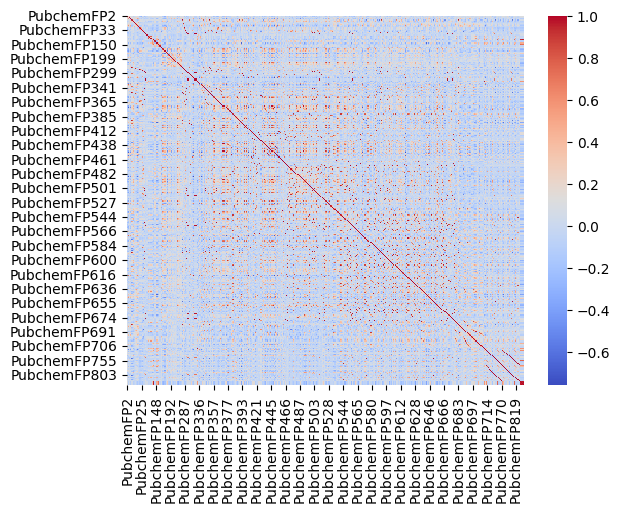

In [48]:
# Create a correlation matrix
X_corr = pd.DataFrame(X)
corr_matrix = X_corr.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [49]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
len(to_drop)
# X_corrdel = X_corr.drop(to_drop, axis=1)
# #X_corrdel.to_csv('data/Xdata_correlationdropped_7546x129.csv')
# X_corrdel.shape

210

In [50]:
df_final = X.drop(to_drop,axis=1)
df_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,...,PubchemFP735,PubchemFP737,PubchemFP738,PubchemFP739,PubchemFP749,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP770,PubchemFP782
0,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10462,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10463,1,1,1,0,1,0,0,1,1,1,...,0,1,0,0,0,0,1,0,0,0
10464,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10465,1,0,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,1,1,0,0


<Axes: >

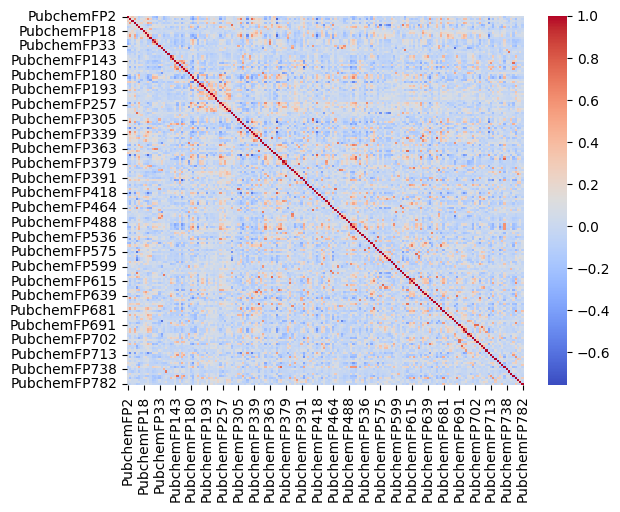

In [51]:
corr_matrix = df_final.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [52]:
df_final.to_csv('data/XdataFinal_10467x176.csv',index = False)

In [53]:
selected_features = df_final.columns.tolist()
len(selected_features)

176

In [54]:
pickle.dump((selected_features),open('data/selected_features.pkl','wb'))

## Regressor Model Training

In [55]:
X = pd.read_csv('data/XdataFinal_10467x176.csv')
X.shape

(10467, 176)

In [56]:
X = X.to_numpy()
print(X.shape)
print(type(X))

(10467, 176)
<class 'numpy.ndarray'>


In [58]:
Y = pd.read_csv('data/Ydata_10467.csv')
Y = Y.pIC50
print(Y.shape)
print(type(Y))

(10467,)
<class 'pandas.core.series.Series'>


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [60]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [01:48<00:00,  2.59s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [01:31<00:00,  2.18s/it]


In [61]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.82,0.82,0.57,0.22
ExtraTreeRegressor,0.82,0.82,0.57,0.16
ExtraTreesRegressor,0.82,0.82,0.57,7.49
GaussianProcessRegressor,0.82,0.82,0.57,14.78
RandomForestRegressor,0.79,0.79,0.62,5.67
MLPRegressor,0.77,0.78,0.63,8.44
BaggingRegressor,0.77,0.77,0.64,0.65
XGBRegressor,0.71,0.72,0.71,1.24
KNeighborsRegressor,0.60,0.61,0.84,0.33


In [62]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.42,0.47,0.99,0.88
LGBMRegressor,0.42,0.47,0.99,0.46
NuSVR,0.42,0.47,0.99,5.25
SVR,0.41,0.46,1.00,6.86
XGBRegressor,0.37,0.43,1.03,1.24
GradientBoostingRegressor,0.36,0.41,1.04,1.79
KNeighborsRegressor,0.35,0.40,1.05,0.22
RandomForestRegressor,0.34,0.40,1.06,5.60
BaggingRegressor,0.31,0.37,1.08,0.60


## Artificial Neural Network

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Lambda
from tensorflow.keras import regularizers
from keras.optimizers.legacy import Adam,Adagrad,Adamax
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [65]:
X = pd.read_csv('data/XdataFinal_10467x176.csv')
X = X.to_numpy()
Y = pd.read_csv('data/Ydata_10467.csv')
Y = Y.pIC50

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=30)

In [67]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(10467, 176)
(10467,)
(8373, 176)
(2094, 176)


In [88]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(176,), kernel_regularizer=regularizers.l2(0.01))) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu')) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))  # changed activation function
optimizer = Adamax(learning_rate=0.001)
model.compile(loss="mean_absolute_error", optimizer=optimizer, metrics=['mae'])  # use the instantiated optimizer

history = model.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_test, y_test))

# The rest of the code remains the same...

Epoch 1/250
838/838 [==============================] - 2s 2ms/step - loss: 3.4586 - mae: 1.1207 - val_loss: 2.5902 - val_mae: 1.3388
Epoch 2/250
838/838 [==============================] - 1s 2ms/step - loss: 1.8542 - mae: 1.0047 - val_loss: 1.4316 - val_mae: 0.8640
Epoch 3/250
838/838 [==============================] - 1s 2ms/step - loss: 1.3866 - mae: 0.9644 - val_loss: 1.1745 - val_mae: 0.8635
Epoch 4/250
838/838 [==============================] - 1s 2ms/step - loss: 1.1805 - mae: 0.9359 - val_loss: 1.0365 - val_mae: 0.8453
Epoch 5/250
838/838 [==============================] - 1s 2ms/step - loss: 1.0874 - mae: 0.9308 - val_loss: 0.9497 - val_mae: 0.8213
Epoch 6/250
838/838 [==============================] - 1s 2ms/step - loss: 0.9978 - mae: 0.8894 - val_loss: 0.9258 - val_mae: 0.8331
Epoch 7/250
838/838 [==============================] - 1s 2ms/step - loss: 0.9567 - mae: 0.8738 - val_loss: 0.8918 - val_mae: 0.8178
Epoch 8/250
838/838 [==============================] - 1s 2ms/step - 

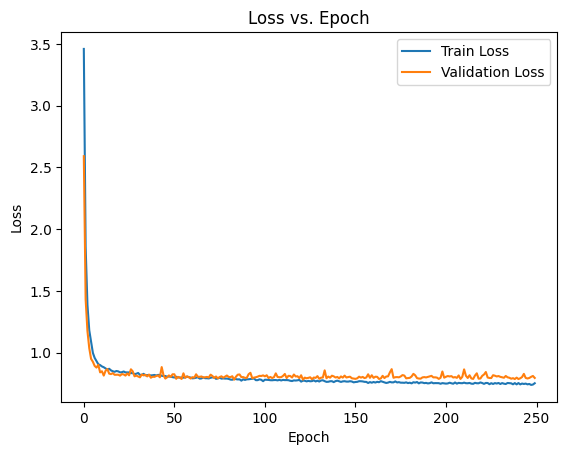

In [89]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, x_pred)
# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)
print('R-squared score for training set:', r2_x)

66/66 [==============================] - 0s 682us/step - loss: 0.7949 - mae: 0.7432
Test loss: 0.7949219346046448
Test accuracy: 0.743177592754364
R-squared score: 0.43920505437698254
R-squared score for training set: 0.5729727376586549


In [91]:
y_pred

array([[6.1395583],
       [8.100974 ],
       [7.472618 ],
       ...,
       [6.766983 ],
       [7.823117 ],
       [7.384919 ]], dtype=float32)

66/66 [==============================] - 0s 669us/step


<Axes: ylabel='pIC50'>

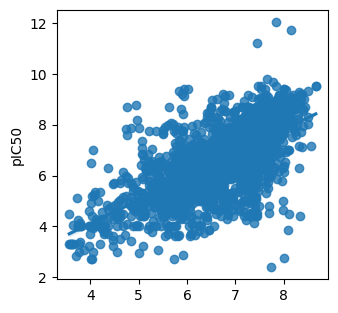

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
y_predicted = model.predict(X_test)
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_predicted, y = y_test, fit_reg=True)

## Final Model saving

In [94]:
X = pd.read_csv('data/XdataFinal_10467x176.csv')
Y = pd.read_csv('data/Ydata_10467.csv')

<Axes: xlabel='pIC50'>

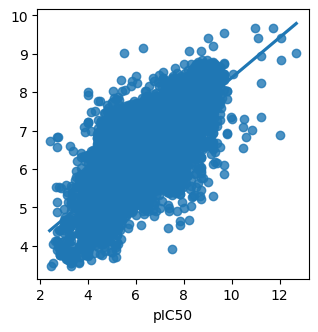

In [95]:
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
model = ltb.LGBMRegressor()
model.fit(X,Y)
y_predicted = model.predict(X)
y_expected = Y
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_expected, y = y_predicted, fit_reg=True)

In [96]:
import pickle
pickle.dump(model,open('data/trained_model.pkl','wb'))

In [1]:
import pickle
import lightgbm as ltb
model = pickle.load(open('data/trained_model.pkl', 'rb'))
model.booster_.save_model('data/trained_model.txt')